<a href="https://colab.research.google.com/github/Meire-Rosa/Arquivos-Legais/blob/master/Mini_Projeto_Rosemeire_Aparecida_Rosa_Oliveira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Premissas do cliente:
1. Casas com 2 ou mais andares;
2. Casas com 2 ou mais quartos;
3. Casas com 2 ou mais banheiros; 
4. Casas Beira mar;
5. Casas com vista classificada em 4;
6. Casas em condição de conservação 4 ou mais. 

Selecionar imóveis com o valor de pe2 menor, dentre os selecionados a partir dessas premissas. 

Importando bibliotecas


In [44]:
#Importacao das bibliotecas pandas e numpy

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Ler o arquivo disponibilizado. 

In [2]:
#Leitura do arquivo disponibilizado
df = pd.read_csv("/content/kc_house_data.csv")

In [3]:
#Visualização do cabeçalho do arquivo
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Informações do DataSet


In [4]:
#Informações do DataSet
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
#Limpeza dos dados 
#Cria uma nova tabela excluindo os valores nulos

df_new = df.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
#Limpeza dos dados
#Removendo as duplicatas

df_new.drop_duplicates(subset ='id', keep = 'first', inplace = True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21436 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21436 non-null  int64  
 1   date           21436 non-null  object 
 2   price          21436 non-null  float64
 3   bedrooms       21436 non-null  int64  
 4   bathrooms      21436 non-null  float64
 5   sqft_living    21436 non-null  int64  
 6   sqft_lot       21436 non-null  int64  
 7   floors         21436 non-null  float64
 8   waterfront     21436 non-null  int64  
 9   view           21436 non-null  int64  
 10  condition      21436 non-null  int64  
 11  grade          21436 non-null  int64  
 12  sqft_above     21436 non-null  int64  
 13  sqft_basement  21436 non-null  int64  
 14  yr_built       21436 non-null  int64  
 15  yr_renovated   21436 non-null  int64  
 16  zipcode        21436 non-null  int64  
 17  lat            21436 non-null  float64
 18  long  

In [7]:
#Transformar os valores do DataFrame em valores numpy
df_new.to_numpy()

array([[7129300520, '20141013T000000', 221900.0, ..., -122.257, 1340,
        5650],
       [6414100192, '20141209T000000', 538000.0, ..., -122.319, 1690,
        7639],
       [5631500400, '20150225T000000', 180000.0, ..., -122.233, 2720,
        8062],
       ...,
       [1523300141, '20140623T000000', 402101.0, ..., -122.299, 1020,
        2007],
       [291310100, '20150116T000000', 400000.0, ..., -122.069, 1410,
        1287],
       [1523300157, '20141015T000000', 325000.0, ..., -122.299, 1020,
        1357]], dtype=object)

In [8]:
# Identificar o nome da cidade a partir das informações do zipcode

In [9]:
#Instalação da biblioteca uszipcode
! pip install uszipcode



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 121 kB 13.5 MB/s 
     |████████████████████████████████| 76 kB 5.1 MB/s 


In [10]:
#Método para obter zipcode, city e população
from uszipcode import SearchEngine
engine = SearchEngine()
zipcode = engine.by_zipcode(60007)
print(zipcode.zipcode, zipcode.major_city, zipcode.population)

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!
60007 Elk Grove Village 33820


In [11]:
#Criação de uma função para retornar somente a cidade, dado o zipcode
def cidade(x):
  from uszipcode import SearchEngine
  engine = SearchEngine()
  zipcode = engine.by_zipcode(x)
  return zipcode.major_city


In [ ]:
#Teste da Função cidade
cidade(60007)

'Elk Grove Village'

In [12]:
#Criando a coluna city no df_new a partir do zipcode 
cities = []
for value in df_new['zipcode']:
  cities.append(cidade(value))

df_new['city'] = cities



Exception ignored in: <function SearchEngine.__del__ at 0x7f609bb7de60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 196, in __del__
    self.close()
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 202, in close
    self.ses.close()
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 1811, in close
    self._close_impl(invalidate=False)
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 1853, in _close_impl
    transaction.close(invalidate)
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 923, in close
    transaction.close()
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2416, in close
    self._do_close()
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2639, in _do_close
    self._close_impl()
  File "/usr/local/lib/python3.7/dist-packages/sqlal

In [13]:
#Calculo do valor do pe² por área construída
#Criando a coluna value_pe2 no df_new a partir das colunas price e sqft_living 
valorpe2 = []
for valor, ft2 in zip(df_new['price'],df_new['sqft_living']):
    valorpe2.append(f"{valor/ft2:.02f}")

df_new['value_pe2'] = valorpe2

In [14]:
#Informações do new
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21436 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21436 non-null  int64  
 1   date           21436 non-null  object 
 2   price          21436 non-null  float64
 3   bedrooms       21436 non-null  int64  
 4   bathrooms      21436 non-null  float64
 5   sqft_living    21436 non-null  int64  
 6   sqft_lot       21436 non-null  int64  
 7   floors         21436 non-null  float64
 8   waterfront     21436 non-null  int64  
 9   view           21436 non-null  int64  
 10  condition      21436 non-null  int64  
 11  grade          21436 non-null  int64  
 12  sqft_above     21436 non-null  int64  
 13  sqft_basement  21436 non-null  int64  
 14  yr_built       21436 non-null  int64  
 15  yr_renovated   21436 non-null  int64  
 16  zipcode        21436 non-null  int64  
 17  lat            21436 non-null  float64
 18  long  

In [15]:
#Alteração do Datatype value_pe2 de object para número.
df_new['value_pe2'] = pd.to_numeric(df_new['value_pe2'],errors = 'coerce')

In [16]:
#descrição da coluna value_pe²
df_new['value_pe2'].describe()

count    21436.000000
mean       263.966511
std        109.947692
min         87.590000
25%        182.127500
50%        244.525000
75%        318.180000
max        800.000000
Name: value_pe2, dtype: float64

In [28]:
#Premissas Iniciais
premissasIniciais = df_new[(df_new['bathrooms']>=2) & (df_new['bedrooms']>=2) & (df_new['floors']>=2) & (df_new['waterfront']==1) & (df_new['view']==4) & (df_new['condition']>=4)]
premissasIniciais

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,value_pe2
540,622049114,20150218T000000,2125000.0,3,2.50,5403,24069,2.0,1,4,...,0,1976,0,98166,47.4169,-122.348,3980,104374,Seattle,393.30
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,2390,1991,0,98040,47.5631,-122.210,4320,24619,Mercer Island,717.19
1361,1925069082,20150511T000000,2200000.0,5,4.25,4640,22703,2.0,1,4,...,1780,1952,0,98052,47.6393,-122.097,3140,14200,Redmond,474.14
2085,8106100105,20141114T000000,3850000.0,4,4.25,5770,21300,2.0,1,4,...,0,1980,0,98040,47.5850,-122.222,4620,22748,Mercer Island,667.24
2140,1224059053,20141027T000000,1700000.0,5,2.00,2500,15250,2.0,1,4,...,0,1942,0,98008,47.5883,-122.111,1880,18782,Bellevue,680.00
2179,3343301920,20150302T000000,1650000.0,3,2.75,2690,8890,2.0,1,4,...,0,1975,1991,98006,47.5487,-122.197,2940,8890,Bellevue,613.38
3252,3343301910,20141020T000000,1000000.0,5,4.50,2120,8944,2.0,1,4,...,0,1939,1963,98006,47.5488,-122.197,2870,8944,Bellevue,471.70
7313,4131900066,20140825T000000,3100000.0,3,3.00,3920,13085,2.0,1,4,...,0,1996,0,98040,47.5716,-122.204,3450,13287,Mercer Island,790.82
8784,3343302110,20150306T000000,1800000.0,3,3.00,2790,13295,2.0,1,4,...,420,1933,1989,98006,47.5466,-122.197,3140,11949,Bellevue,645.16
11257,3761100045,20140618T000000,3000000.0,4,4.25,4850,12445,2.0,1,4,...,1000,1989,0,98034,47.7011,-122.244,3350,12210,Kirkland,618.56


In [21]:
premissasIniciais.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,value_pe2
count,2.300000e+01,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.0,23.0,23.0,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,3.539420e+09,2.154170e+06,3.565217,3.293478,3735.347826,18157.391304,2.0,1.0,4.0,4.260870,...,3066.217391,669.130435,1969.826087,431.434783,98079.478261,47.559478,-122.249435,3042.608696,20903.826087,557.110435
std,2.448925e+09,1.156116e+06,1.079818,0.990443,1449.720525,9021.776895,0.0,0.0,0.0,0.448978,...,1236.574446,737.673943,20.805708,837.003466,67.502774,0.109727,0.110831,741.185889,19612.678505,150.202919
min,2.840001e+08,6.000000e+05,2.000000,2.000000,2050.000000,5575.000000,2.0,1.0,4.0,4.000000,...,1600.000000,0.000000,1930.000000,0.000000,98006.000000,47.353500,-122.462000,1610.000000,5575.000000,258.620000
25%,1.873554e+09,1.260000e+06,3.000000,2.500000,2740.000000,12804.000000,2.0,1.0,4.0,4.000000,...,2190.000000,0.000000,1954.000000,0.000000,98036.500000,47.524300,-122.336000,2605.000000,12205.000000,458.360000
50%,3.343302e+09,1.800000e+06,3.000000,3.000000,3410.000000,17861.000000,2.0,1.0,4.0,4.000000,...,2590.000000,420.000000,1976.000000,0.000000,98052.000000,47.571600,-122.239000,2990.000000,14810.000000,604.980000
75%,3.946500e+09,2.875000e+06,4.000000,4.125000,4735.000000,22000.500000,2.0,1.0,4.0,4.500000,...,3885.000000,1220.000000,1987.000000,0.000000,98141.000000,47.620550,-122.197000,3400.000000,23173.000000,666.550000
max,8.106100e+09,5.300000e+06,6.000000,6.000000,7390.000000,49456.000000,2.0,1.0,4.0,5.000000,...,5770.000000,2390.000000,1996.000000,1991.000000,98198.000000,47.772900,-122.083000,4620.000000,104374.000000,790.820000


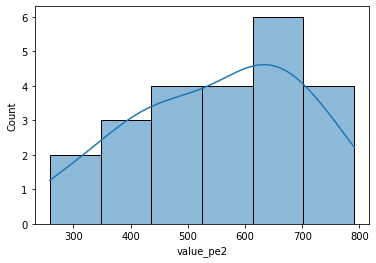

In [27]:
sns.histplot(data=premissasIniciais,x='value_pe2',kde=True);

Observa-se pelo histograma, que a média do valor do pe_2 varia entre 500 e 600.  

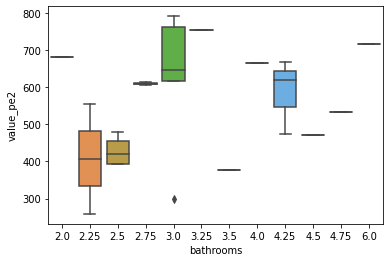

In [25]:
sns.boxplot(data=premissasIniciais, x='bathrooms', y='value_pe2'); 

De acordo com o boxplot que relaciona o número de banheiros com o valor de pe_2, identificamos a existência de um outlier. Vamos analisá-lo. 


In [31]:
premissasIniciais[(premissasIniciais['bathrooms']==3)& (premissasIniciais['value_pe2']<300)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,value_pe2
12935,3222049044,20140612T000000,835000.0,3,3.0,2790,12523,2.0,1,4,...,1190,1977,0,98198,47.3571,-122.324,2990,11476,Seattle,299.28


In [33]:
premissasIniciais[(premissasIniciais['bathrooms']==3)& (premissasIniciais['value_pe2']>700)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,value_pe2
7313,4131900066,20140825T000000,3100000.0,3,3.0,3920,13085,2.0,1,4,...,0,1996,0,98040,47.5716,-122.204,3450,13287,Mercer Island,790.82
14822,3623500408,20150330T000000,2600000.0,3,3.0,3410,16015,2.0,1,4,...,1190,1973,0,98040,47.5721,-122.239,3760,16572,Mercer Island,762.46


Observa-se que o imóvel 3222049044, localizado na cidade de Seattle possui todas as premissas solicitadas pelo cliente e apresenta o menor valor de pe_2. Nessas condições, indico ele para a compra. 
Com esse mesmo viés, não indico a compra dos imóveis 4131900066 e 3623500408, ambos localizados na cidade de Mercer Island, pois possuem o maior valor de pe_2. 

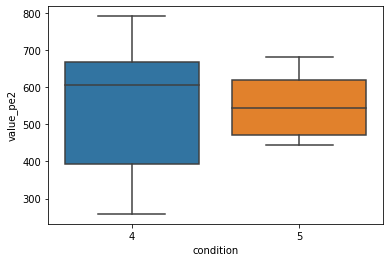

In [34]:
sns.boxplot(data=premissasIniciais, x='condition', y='value_pe2'); 

Pelo boxplot que relaciona condição do imóvel com o valor do pe_2, podemos analisar que existem imóveis em condição 5 com menor valor de pe_2 que algum(ns) imóveis em condição 4. Vamos analisá-los. 


In [36]:
premissasIniciais[(premissasIniciais['condition']==4)& (premissasIniciais['value_pe2']>700)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,value_pe2
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,2390,1991,0,98040,47.5631,-122.210,4320,24619,Mercer Island,717.19
7313,4131900066,20140825T000000,3100000.0,3,3.00,3920,13085,2.0,1,4,...,0,1996,0,98040,47.5716,-122.204,3450,13287,Mercer Island,790.82
14822,3623500408,20150330T000000,2600000.0,3,3.00,3410,16015,2.0,1,4,...,1190,1973,0,98040,47.5721,-122.239,3760,16572,Mercer Island,762.46
15255,2425049063,20140911T000000,3640900.0,4,3.25,4830,22257,2.0,1,4,...,0,1990,0,98039,47.6409,-122.241,3820,25582,Medina,753.81


In [38]:
premissasIniciais[(premissasIniciais['condition']==5)& (premissasIniciais['value_pe2']>600)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,value_pe2
2140,1224059053,20141027T000000,1700000.0,5,2.00,2500,15250,2.0,1,4,...,0,1942,0,98008,47.5883,-122.111,1880,18782,Bellevue,680.00
11257,3761100045,20140618T000000,3000000.0,4,4.25,4850,12445,2.0,1,4,...,1000,1989,0,98034,47.7011,-122.244,3350,12210,Kirkland,618.56
14619,7936500109,20140725T000000,2230000.0,3,3.00,3620,28064,2.0,1,4,...,1250,1977,0,98136,47.5516,-122.398,2550,34713,Seattle,616.02


Com as análises realizadas com relação à condição do imóvel, descarto a compra do imóvel 4131900066 na cidade de Mercer Island, por possuir o maior valor do pe_2 e estar em condição 4. Ao analisar os imóveis 3761100045 na cidade de Kirkland e 7936500109, na cidade de Seatlle, verifica-se um valor de pe_2 menor e com as características banheiro e quartos iguais ou melhores.  

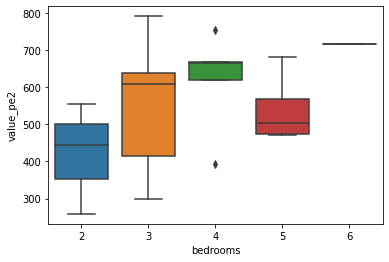

In [40]:
sns.boxplot(data=premissasIniciais, x='bedrooms', y='value_pe2');

A partir do boxplot que relaciona número de quartos com o valor do pe_2,  podemos observar a existência de dois outliers quando o número de quartos é igual a 4. Vamos analisá-los.


In [41]:
premissasIniciais[(premissasIniciais['bedrooms']==4)& (premissasIniciais['value_pe2']<500)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,value_pe2
18722,7204200025,20141028T000000,1225000.0,4,2.5,3120,49456,2.0,1,4,...,530,1974,1989,98198,47.3535,-122.323,2030,32181,Seattle,392.63


In [42]:
premissasIniciais[(premissasIniciais['bedrooms']==4)& (premissasIniciais['value_pe2']>700)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,value_pe2
15255,2425049063,20140911T000000,3640900.0,4,3.25,4830,22257,2.0,1,4,...,0,1990,0,98039,47.6409,-122.241,3820,25582,Medina,753.81


Observa-se que o imóvel 7204200025 na cidade de Seatlle, possui o menor valor de pe_2 dentre os imóveis com 4 quartos e todas as premissas solicitadas pelo cliente. Nesse contexto, indico sua compra. 

Nesta mesma análise, observa-se que o imóvel 2425049063 na cidade de Medina possui o maior valor de pe_2 dentre os imóveis com 4 quartos. Assim, sugiro que não seja adquirido. 

Diante das análises realizadas, restam os seguintes imóveis para análise. Nesse momento, volto a conversar com meu cliente para saber o que ele considera mais interessante para a escolha do último imóvel a ser comprado e o último a ser descartado. 

In [58]:
premissasDois = premissasIniciais[(premissasIniciais['id']!=3222049044) & (premissasIniciais['id']!=7204200025) & (premissasIniciais['id']!=3761100045) & (premissasIniciais['id']!=7936500109) & (premissasIniciais['id']!= 4131900066) & (premissasIniciais['id']!=3623500408) & (premissasIniciais['id']!= 4131900066) & (premissasIniciais['id']!=2425049063)]
premissasDois

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,value_pe2
540,622049114,20150218T000000,2125000.0,3,2.50,5403,24069,2.0,1,4,...,0,1976,0,98166,47.4169,-122.348,3980,104374,Seattle,393.30
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,2390,1991,0,98040,47.5631,-122.210,4320,24619,Mercer Island,717.19
1361,1925069082,20150511T000000,2200000.0,5,4.25,4640,22703,2.0,1,4,...,1780,1952,0,98052,47.6393,-122.097,3140,14200,Redmond,474.14
2085,8106100105,20141114T000000,3850000.0,4,4.25,5770,21300,2.0,1,4,...,0,1980,0,98040,47.5850,-122.222,4620,22748,Mercer Island,667.24
2140,1224059053,20141027T000000,1700000.0,5,2.00,2500,15250,2.0,1,4,...,0,1942,0,98008,47.5883,-122.111,1880,18782,Bellevue,680.00
2179,3343301920,20150302T000000,1650000.0,3,2.75,2690,8890,2.0,1,4,...,0,1975,1991,98006,47.5487,-122.197,2940,8890,Bellevue,613.38
3252,3343301910,20141020T000000,1000000.0,5,4.50,2120,8944,2.0,1,4,...,0,1939,1963,98006,47.5488,-122.197,2870,8944,Bellevue,471.70
8784,3343302110,20150306T000000,1800000.0,3,3.00,2790,13295,2.0,1,4,...,420,1933,1989,98006,47.5466,-122.197,3140,11949,Bellevue,645.16
11446,624069035,20141209T000000,2750000.0,4,4.00,4130,5575,2.0,1,4,...,1270,1993,0,98075,47.5968,-122.083,2980,5575,Sammamish,665.86
11844,2623039082,20150218T000000,770000.0,3,3.50,2050,21744,2.0,1,4,...,300,1930,0,98166,47.4536,-122.376,2300,12200,Seattle,375.61


O cliente pede para que o último imóvel escolhido para a compra, tenha sido construído após 1990. E ele não deseja, de forma alguma, adquirir um imóvel que tenha sido construído antes de 1930. 

In [62]:
premissasDois[(premissasDois['yr_built']>=1990)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,value_pe2
1315,7558700030,20150413T000000,5300000.0,6,6.0,7390,24829,2.0,1,4,...,2390,1991,0,98040,47.5631,-122.210,4320,24619,Mercer Island,717.19
11446,624069035,20141209T000000,2750000.0,4,4.0,4130,5575,2.0,1,4,...,1270,1993,0,98075,47.5968,-122.083,2980,5575,Sammamish,665.86


In [63]:
premissasDois[(premissasDois['yr_built']<=1930)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,value_pe2
11844,2623039082,20150218T000000,770000.0,3,3.5,2050,21744,2.0,1,4,...,300,1930,0,98166,47.4536,-122.376,2300,12200,Seattle,375.61


Com base nessas premissas, o imóvel 624069035, na cidade de Sammamish foi escolhido para a compra e o imóvel 2623039082 foi escolhido para não ser comprado de forma alguma.  

In [59]:
premissasDois.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,value_pe2
count,1.600000e+01,1.600000e+01,16.000000,16.000000,16.000000,16.000000,16.0,16.0,16.0,16.000000,...,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,3.068897e+09,2.057188e+06,3.625000,3.359375,3710.812500,16485.937500,2.0,1.0,4.0,4.250000,...,3071.43750,639.375000,1964.375000,495.875000,98071.437500,47.570006,-122.235250,3001.875000,20922.937500,536.247500
std,2.501761e+09,1.228179e+06,1.258306,1.143710,1680.500688,6091.997981,0.0,0.0,0.0,0.447214,...,1306.61282,818.661255,22.297608,887.069323,63.821594,0.100885,0.124285,792.003525,22922.261545,129.902508
min,2.840001e+08,6.000000e+05,2.000000,2.000000,2050.000000,5575.000000,2.0,1.0,4.0,4.000000,...,1750.00000,0.000000,1930.000000,0.000000,98006.000000,47.390500,-122.462000,1610.000000,5575.000000,258.620000
25%,1.397340e+09,1.271250e+06,3.000000,2.500000,2455.000000,12207.250000,2.0,1.0,4.0,4.000000,...,2157.50000,0.000000,1941.250000,0.000000,98008.000000,47.535450,-122.355000,2630.000000,12137.250000,465.030000
50%,2.274054e+09,1.700000e+06,3.000000,2.875000,2860.000000,18296.000000,2.0,1.0,4.0,4.000000,...,2595.00000,150.000000,1974.500000,0.000000,98052.000000,47.574050,-122.203500,2960.000000,14505.000000,543.910000
75%,3.413741e+09,2.337500e+06,5.000000,4.250000,4830.750000,21411.000000,2.0,1.0,4.0,4.250000,...,3255.00000,1287.500000,1981.250000,490.750000,98130.250000,47.612775,-122.111750,3140.000000,19876.250000,650.335000
max,8.106100e+09,5.300000e+06,6.000000,6.000000,7390.000000,24829.000000,2.0,1.0,4.0,5.000000,...,5770.00000,2390.000000,1993.000000,1991.000000,98177.000000,47.772900,-122.083000,4620.000000,104374.000000,717.190000


In [ ]:
# Boxplot day - total_bill
#sns.boxplot(data=premissasIniciais, x='bathrooms', y='city', hue='condition', palette='tab10');

In [ ]:
#Filtro para propor uma análise
#df_new[(df_new['value_pe2']<=153.000) & (df_new['waterfront']==0) & (df_new['view']>=4) ]

In [ ]:
#Análise 1 - Selecionando as colunas: id, cidade, valor_pe2, quartos, banheiros, condition, grade, waterfront e view.  

#analiseUm = df_new[['id', 'city', 'value_pe2', 'bedrooms', 'bathrooms', 'condition', 'grade', 'waterfront','view']]
#analiseUm

In [ ]:
#O número de banheiros deve ser um int. 
#Faz o arredondamento e depois transforma em número inteiro: Ex: 291,51 = 292
#analiseUm['bathrooms'] = (round(analiseUm['bathrooms'])).values.astype(np.int64)


In [ ]:
#analiseUm

In [ ]:
#Análise da cidade com pe² mais alto
#analiseUm[(analiseUm['city']=='Medina')]


In [ ]:
#Analise da cidade de Seattle com condições 
#analiseUm[(analiseUm['city']=='Seattle') & (analiseUm['waterfront']==1) & (analiseUm['view']==4) & (analiseUm['condition']>=4) ]


In [ ]:
#Análise da cidade de Kirkland 
#analiseUm[(analiseUm['city']=='Kirkland')& (analiseUm['view']>=3)]

In [ ]:
#Análise da cidade de Federal Way
#analiseUm[(analiseUm['city']=='Federal Way')& (analiseUm['view']>=3)]

In [ ]:
#Analise da cidade de Mercer Island
#analiseUm[(analiseUm['city']=='Mercer Island')& (analiseUm['view']>=3)]

In [ ]:
#Análise da cidade de Redmond
#analiseUm[(analiseUm['city']=='Redmond')& (analiseUm['view']>=3)]

In [ ]:
#Analise do preco medio do pe² por cidade
#analiseUm_grop = analiseUm.groupby(['city'])['value_pe2'].agg('mean').reset_index()

In [ ]:
#analiseUm_grop

In [43]:
# AnaliseUm com gráfico de barras



In [ ]:
#fig = plt.figure(figsize=(20, 9))

#plt.bar(analiseUm_grop['city'], analiseUm_grop['value_pe2'], color = 'orange',  width = 0.1)
#ax = analiseUm_grop.plot.bar(x='city',y='value_pe2',figsize=(20, 9) )

#plt.plot(x,y, color = 'green', linewidth = '2')
#plt.show()

#plt.ylabel('Valor pe2')



#plt.title('Valor pe2 para cada cidade', loc = 'center',fontsize = 18, fontweight = 'bold', color = 'black')